<a href="https://colab.research.google.com/github/ibarajas248/ejemplos_regresion_lineal/blob/main/Ejemplos_de_regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion Líneal suledo en funcion de la experienci



1.   Elemento de lista
2.   Elemento de lista




#instalar librerias

instalar

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Introduccion a la Regresión Lineal
La regresión lineal es un método estadístico utilizado para modelar la relación entre una variable dependiente
𝑦
y y una o más variables independientes
𝑥
x. Su ecuación es:

𝑦
=
𝑚
𝑥
+
𝑏




Donde:

𝑦
y es la variable dependiente (respuesta),
𝑥
x es la variable independiente (predictora),
𝑚
m es la pendiente de la línea,
𝑏
b es la intersección con el eje
𝑦
y.


##Regresión Lineal Simple en Python


Vamos a predecir el salario en función de los años de experiencia usando sklearn.

# Paso 1: Importar librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#Paso 2: Crear un dataset de ejemplo

In [ ]:
import pandas as pd
# Datos de años de experiencia y salario
data = {
    "AñosExperiencia": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salario": [25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000]
}

df = pd.DataFrame(data)


In [ ]:
df

,AñosExperiencia,Salario
0,1,25000
1,2,30000
2,3,35000
3,4,40000
4,5,45000
5,6,50000
6,7,55000
7,8,60000
8,9,65000
9,10,70000


# Paso 3: Separar variables independientes (X) y dependientes (y)

In [ ]:
X = df[["AñosExperiencia"]]  # Matriz de características
y = df["Salario"]  # Variable objetivo


Paso 4: Dividir los datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Paso 5: Crear y entrenar el modelo

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

#Paso 6: Hacer predicciones

In [ ]:
y_pred = modelo.predict(X_test)


#Paso 7: Evaluar el modelo


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse:.2f}")
print(f"Coeficiente de Determinación R^2: {r2:.2f}")


Error Cuadrático Medio: 0.00
Coeficiente de Determinación R^2: 1.00


## visualizar regresión

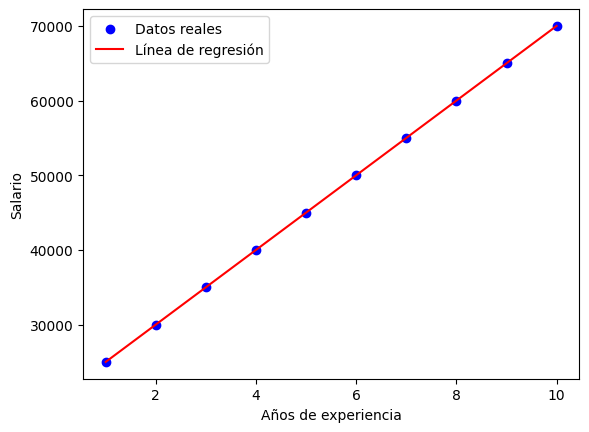

In [ ]:
plt.scatter(X, y, color="blue", label="Datos reales")
plt.plot(X, modelo.predict(X), color="red", label="Línea de regresión")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.legend()
plt.show()


## Regresión Lineal multiple

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Datos de ejemplo
data = {
    "AñosExperiencia": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "NivelEducativo": [2, 3, 2, 4, 3, 5, 4, 6, 5, 7],
    "Salario": [25000, 28000, 32000, 40000, 42000, 52000, 54000, 62000, 65000, 70000]
}

df = pd.DataFrame(data)

# Separar variables
X = df[["AñosExperiencia", "NivelEducativo"]]
y = df["Salario"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Crear malla para la superficie de regresión
X_surf, Y_surf = np.meshgrid(
    np.linspace(df["AñosExperiencia"].min(), df["AñosExperiencia"].max(), 20),
    np.linspace(df["NivelEducativo"].min(), df["NivelEducativo"].max(), 20)
)

Z_surf = modelo.predict(np.c_[X_surf.ravel(), Y_surf.ravel()])
Z_surf = Z_surf.reshape(X_surf.shape)

# Crear la figura interactiva con Plotly
fig = go.Figure()

# Agregar puntos reales
fig.add_trace(go.Scatter3d(
    x=df["AñosExperiencia"],
    y=df["NivelEducativo"],
    z=df["Salario"],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name="Datos reales"
))

# Agregar la superficie de regresión
fig.add_trace(go.Surface(
    x=X_surf,
    y=Y_surf,
    z=Z_surf,
    colorscale='reds',
    opacity=0.5,
    name="Superficie de regresión"
))

# Configurar etiquetas y título
fig.update_layout(
    title="Regresión Lineal Múltiple en 3D (Interactivo)",
    scene=dict(
        xaxis_title="Años de Experiencia",
        yaxis_title="Nivel Educativo",
        zaxis_title="Salario"
    )
)

# Mostrar la figura interactiva
fig.show()


MSE: 5795231.53
R²: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


 Explicación


📌 Los puntos azules representan los valores reales de salario en función de la experiencia y la educación.

📈 La superficie roja representa la predicción del modelo.